#### Імпорт необхідних бібліотек

In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#### Приклад кластеризації на синтетичних даних

In [2]:
n_clusters = 6
X, y = make_blobs(n_samples=300, centers=n_clusters, cluster_std=0.60, random_state=10)

kmeans = KMeans(n_clusters=6, random_state=10)
labels = kmeans.fit_predict(X)

#### Оцінка кластеризації за допомогою метрик Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index

In [3]:
def show_clustering_metrics(X: np.ndarray, labels: np.ndarray) -> None:
    print("Cluster quality metrics:")
    print(f"Silhouette Score: {silhouette_score(X, labels):.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X, labels):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X, labels):.4f}")

show_clustering_metrics(X, labels)

Cluster quality metrics:
Silhouette Score: 0.8257
Calinski-Harabasz Index: 6868.1834
Davies-Bouldin Index: 0.2411


#### Діаграми розсіювання для синтетичних даних та отриманих кластерів

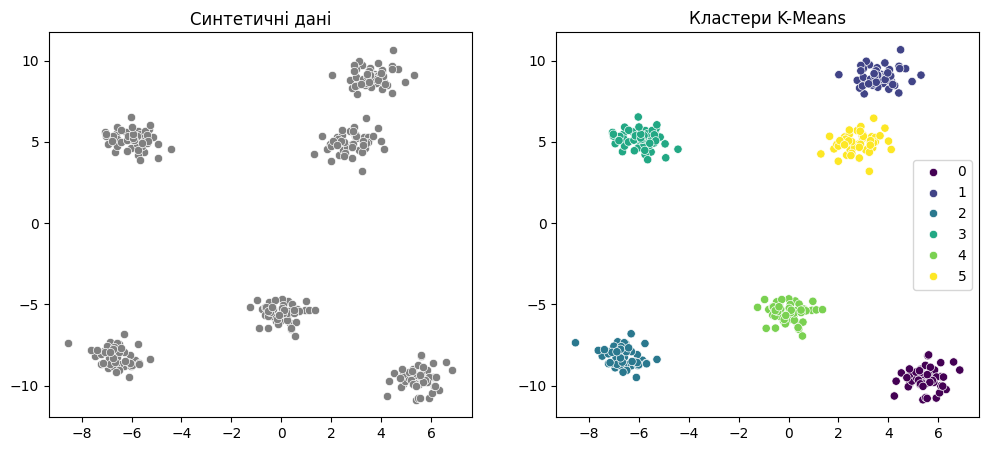

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], color="gray")
plt.title("Синтетичні дані")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis")
plt.title("Кластери K-Means")

plt.show()

#### Завантаження Wine dataset у Datafarme

In [5]:
wine = load_wine()
X, y, features = wine.data, wine.target, wine.feature_names

df = pd.DataFrame(X, columns=features)
df["real_class"] = y
df.head(15)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,real_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


#### Статистичні показники набору даних

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,real_class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### Приклад кластеризації реальних даних з попередньою стандартизацією

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=df["real_class"].nunique(), random_state=12)
kmeans.fit(X_scaled)
labels = kmeans.labels_

show_clustering_metrics(X_scaled, labels)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
df["cluster"] = labels
df["real_class"] = y

Cluster quality metrics:
Silhouette Score: 0.2849
Calinski-Harabasz Index: 70.9400
Davies-Bouldin Index: 1.3892


#### Діаграми розсіювання для реальних класів та отриманих кластерів

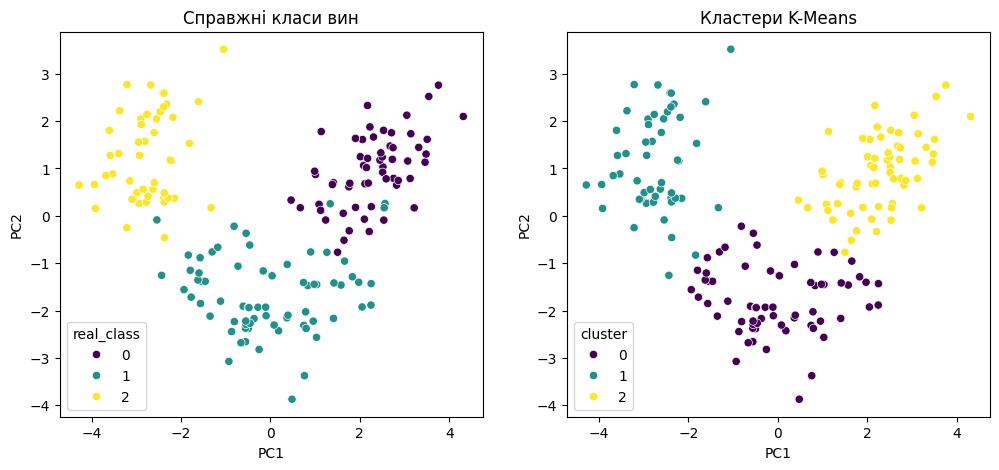

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="PC1", y="PC2", hue="real_class", palette="viridis")
plt.title("Справжні класи вин")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="PC1", y="PC2", hue="cluster", palette="viridis")
plt.title("Кластери K-Means")

plt.show()

#### Сегментація зображення за кольоровою ознакою з використанням кластеризації

In [9]:
def cluster_image(pixels: np.ndarray, n_clusters: int) -> np.ndarray:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=500, random_state=12)
    kmeans.fit(pixels)
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    return centers[labels].reshape(image.shape)

image = cv2.imread("data/fruits.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.GaussianBlur(image, (7, 7), 0)
pixels = image.reshape(-1, 3)

#### Вивід оригінального зображення

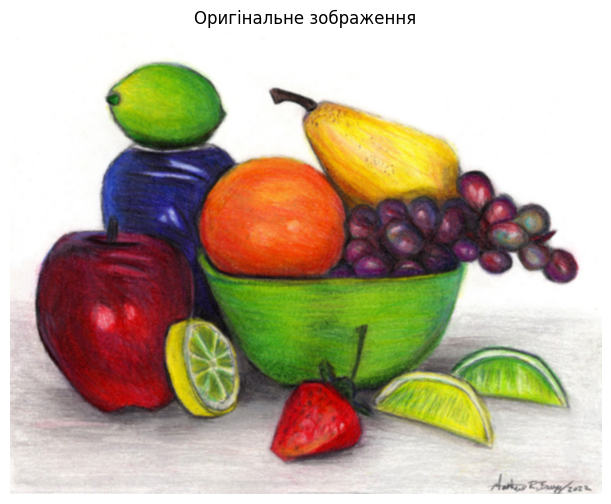

In [10]:
plt.figure(figsize=(10, 6))
plt.title("Оригінальне зображення")
plt.imshow(image)
plt.axis("off")
plt.show()

#### Сегментовані зображення з різною кількістю кластерів

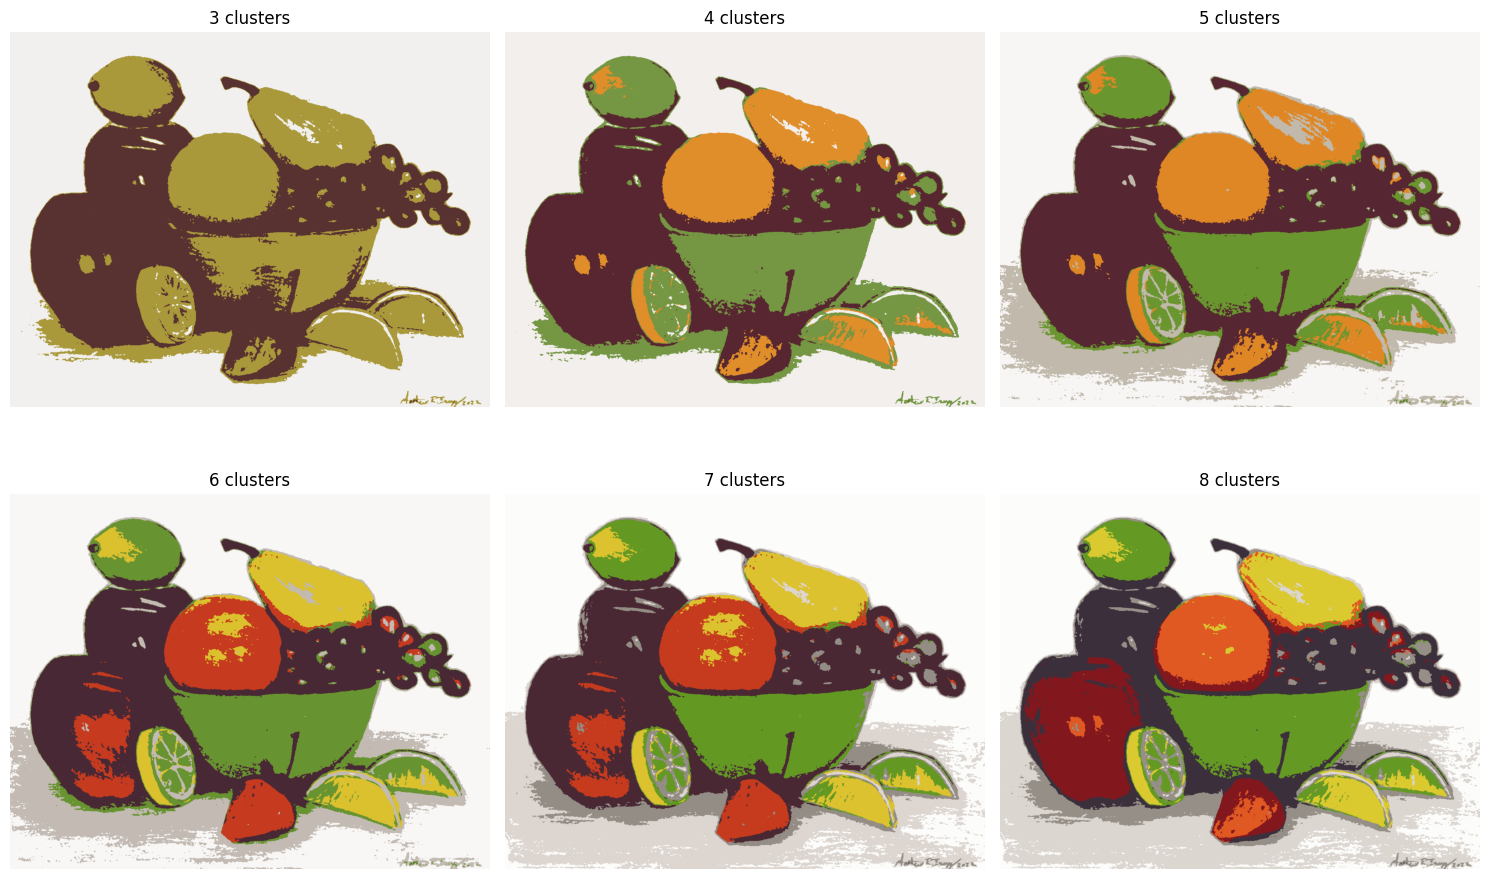

In [11]:
cluster_counts = range(3, 9)

plt.figure(figsize=(15, 10))

for i, n_clusters in enumerate(cluster_counts):
    segmented_image = cluster_image(pixels, n_clusters)
    plt.subplot(2, len(cluster_counts) // 2, i + 1)
    plt.title(f"{n_clusters} clusters")
    plt.imshow(segmented_image)
    plt.axis("off")

plt.tight_layout()
plt.show()

#### Попередня обробка зображення та виділення об'єктів

In [12]:
image = cv2.imread("data/birds.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result_image = image_rgb.copy()

birds, min_area = [], 2000

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        birds.append(contour)
        cv2.drawContours(result_image, [contour], -1, (0, 255, 0), 3)

#### Візуалізація виділенних об'єктів та проміжних кроків

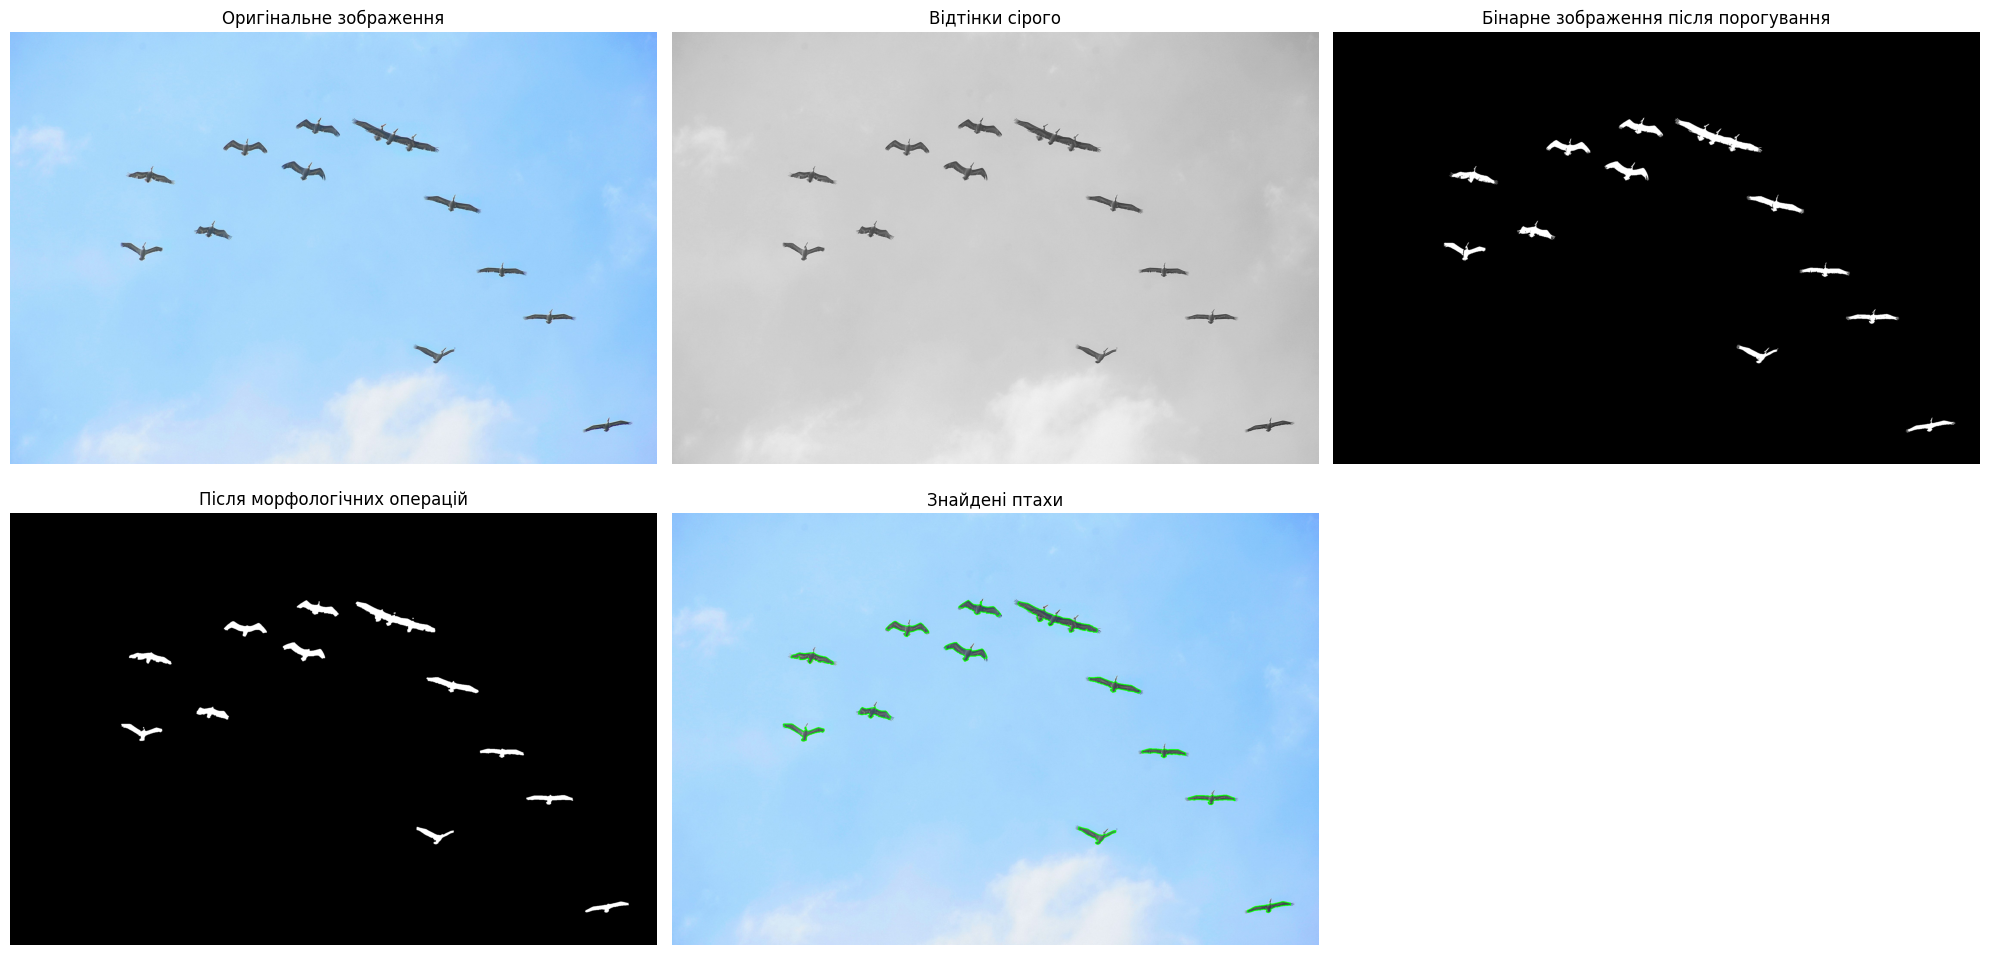

Кількість знайдених птахів: 12


In [13]:
images_with_captions = [
    (image_rgb, "Оригінальне зображення"),
    (gray, "Відтінки сірого"),
    (thresh, "Бінарне зображення після порогування"),
    (closing, "Після морфологічних операцій"),
    (result_image, "Знайдені птахи")
]

plt.figure(figsize=(20,10))

for i, (img, caption) in enumerate(images_with_captions):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(caption)
    plt.axis("off")

plt.tight_layout()
plt.show()

print("Кількість знайдених птахів:", len(birds))